In [4]:
%matplotlib inline
import csv
import random
import numpy as np
import scipy.stats
import csv
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
from collections import defaultdict
from sklearn import svm 
from sklearn import linear_model
from sklearn import dummy
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import metrics
import nltk
import string
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))

In [5]:
data = []
with open('all_clean.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        data.append(row)

In [6]:
# (verbal, quantiative)
newGREPercentileDict = {
    170: (99,96),
    169: (99,96),
    168: (98,94),
    167: (98,91),
    166: (97,90),
    165: (96,88),
    164: (94,86),
    163: (93,83),
    162: (91,80),
    161: (88,77),
    160: (86,74),
    159: (83,72),
    158: (80,68),
    157: (76,65),
    156: (73,61),
    155: (69,58),
    154: (65,54),
    153: (61,50),
    152: (56,46),
    151: (52,42),
    150: (47,38),
    149: (42,34),
    148: (38,30),
    147: (34,26),
    146: (31,23),
    145: (27,20),
    144: (23,16),
    143: (20,14),
    142: (17,12),
    141: (14,10),
    140: (11,8),
    139: (9,6),
    138: (8,4),
    137: (6,3),
    136: (4,2),
    135: (3,2),
    134: (2,1),
    133: (2,1),
    132: (1,1),
    131: (1,1),
    130:(1,1),
}

# (verbal, quantitative)
oldGREPercentileDict = {
    800: (99,91),
    790: (99,87),
    780: (99,84),
    770: (99,78),
    760: (99,76),
    750: (99,73),
    740: (99,69),
    730: (98,66),
    720: (98,62),
    710: (98,59),
    700: (97,59),
    690: (96,55),
    680: (96,51),
    670: (94,47),
    660: (94,47),
    650: (93,43),
    640: (91,43),
    630: (91,38),
    620: (88,35),
    610: (86,35),
    600: (86,30),
    590: (83,30),
    580: (80,27),
    570: (80,27),
    560: (76,24),
    550: (73,24),
    540: (73,20),
    530: (69,20),
    520: (65,17),
    510: (65,17),
    500: (61,17),
    490: (56,14),
    480: (56,14),
    470: (52,12),
    460: (52,12),
    450: (48,10),
    440: (43,10),
    430: (43,10),
    420: (39,8),
    410: (35,8),
    400: (31,8),
    390: (31,6),
    380: (27,6),
    370: (24,4),
    360: (20,4),
    350: (20,4),
    340: (17,3),
    330: (15,3),
    320: (12,2),
    310: (9,2),
    300: (8,2),
    290: (6,2),
    280: (3,2),
    270: (2,1),
    260: (2,1),
    250: (1,1),
    240: (1,1),
    230: (1,1),
    220: (1,1),
    210: (1,1),
    200: (1,1),
}

# To improve accuracy
majorAggregatorDict = {
    'Computer Science': ['computer sc', 'computer and information', 
                         'machine learning', 'data science', 'eecs', 
                         'software', 'human computer', 'human-computer'],
    'Electrical and Computer Engineering': ['ece','electrical','computer eng','robotic'],
    'Economics': ['econ'],
    'Mathematics': ['math','computation'],
    'English': ['english'],
    'Physics': ['physics'],
    'Speech Language Pathology': ['speech', 'commu', 'disorder'],
    'Political Science': ['politic', 'government', 'international', 'global', 'intl',
                          'public admin', 'policy', 'public affairs', 'public rela'],
    'Mechanical Engineering': ['mechan'],
    'Education': ['education', 'instruct','Curri','teach'],
    'Civil Engineering': ['civil'],
    'Psychology': ['psychology', 'psych'],
    'Anthropology': ['anthrop'],
    'Management Science': ['manage'],
    'Chemistry': ['chemistry','chems'],
    'Chemical Engineering': ['chemical'],
    'Statistics': ['stats', 'statis'],
    'Biological Science': ['biology', 'biological', 'bio','mole','immu','toxi','gene'],
    'Environemntal Science': ['environment'],
    'Social/Cultural Studies': ['culture', 'asia', 'africa', 'latin', 'american', 'eastern',
                         'east', 'islamic', 'christian', 'arab','gender','women','ethnic'],
    'History': ['history', 'historical'],
    'Linguistics': ['linguistics', 'language', 'spanish', 'chinese', 'japanese', 
                    'french', 'italian','german','russian'],
    'Neuroscience': ['neuro'],
    'Architecture': ['archi'],
    'Earth Science': ['earth', 'geo','soil','planet'],
    'Finance': ['finan'],
    'Material Science': ['material'],
    'Social Work': ['social'],
    'Industrial Engineering': ['indust'],
    'Health Science': ['health','mph'],
    'Urban Planning': ['city', 'urban','region','planning'],
    'Creative Writing': ['writing'],
    'Congnitive Science': ['cogni'],
    'Information science': ['information', 'informatic'],
    'Criminal Justice': ['crimi'],
    'Religious Study': ['religi','divin'],
    'Music': ['music'],
    'Arts': ['art','media','visual','film','cinema','movie', 'theatre','perform'],
    'Literature': ['lite', 'classic'],
    'Aerospace Engineering': ['aero'],
    'Philosophy': ['philo'],
    'Petroleum Engineering': ['petro'],
    'Business': ['busi', 'mba'],
    'Pharmaceutical Sciences': ['pharma', 'medi'],
    'Nuclear Engineering': ['nuclear'],
    'Marketing': ['market', 'adv'],
    'Operational Research': ['operation'],
    'Nano Engineering': ['nano'],
    'Energy Science': ['energy'],
    'System Engineering': ['system'],
    'Therapy and Counseling': ['therapy','couns']
}

def majorAggregator(major):
    for k in majorAggregatorDict.keys():
        for majorWord in majorAggregatorDict[k]:
            if majorWord in major.lower():
                return k
    return 'other'

In [7]:
# only care about accepted and rejected entries
data = [d for d in data if d[9] != '' and d[10] != '' and d[11] != '' and d[12] != '']
data = [d for d in data if d[5] == 'Accepted' or d[5] == 'Rejected']

In [6]:
majorDict = defaultdict(int)
degreeDict = defaultdict(int)
universityDict = defaultdict(int)
universityAcceptanceRateDict = defaultdict(list)
universityGPADict = defaultdict(list)
universityGREVDict = defaultdict(list)
universityGREQDict = defaultdict(list)
universityGREWDict = defaultdict(list)
majorAcceptanceRateDict = defaultdict(list)
majorGPADict = defaultdict(list)
majorGREWDict = defaultdict(list)
majorGREVDict = defaultdict(list)
majorGREQDict = defaultdict(list)
decisionDict = defaultdict(int)
statusDict = defaultdict(int)
gpas = []
greVerbal = []
greQuant = []
greWriting = []

random.shuffle(data)
for d in data[:15000]:
    uniName = d[1]
    major = majorAggregator(d[2])
    degree = d[3]
    decision = d[5]
    gpa = d[9]
    greV = d[10]
    greQ = d[11]
    greW = d[12]
    isNewGRE = d[13]
    status = d[15]
    comment = d[18]
    
    universityDict[uniName] += 1
    majorDict[major] += 1
    degreeDict[degree] += 1
    decisionDict[decision] += 1
    
    if decision == 'Accepted':
        universityAcceptanceRateDict[uniName].append(1)
        majorAcceptanceRateDict[major].append(1)
    else:
        universityAcceptanceRateDict[uniName].append(0)
        majorAcceptanceRateDict[major].append(0)
    
    if float(gpa) <= 4:
        gpas.append(float(gpa))
        universityGPADict[uniName].append(float(gpa))
        if d[5] == 'Accepted':
            majorGPADict[major].append(float(gpa))
        
    if isNewGRE == 'True':
        greVerbal.append(newGREPercentileDict[float(greV)][0])
        if d[5] == 'Accepted':
            universityGREVDict[uniName].append(newGREPercentileDict[float(greV)][0])
            majorGREVDict[major].append(newGREPercentileDict[float(greV)][0])
    else:
        greVerbal.append(oldGREPercentileDict[float(greV)][0])
        if d[5] == 'Accepted':
            universityGREVDict[uniName].append(oldGREPercentileDict[float(greV)][0])
            majorGREVDict[major].append(oldGREPercentileDict[float(greV)][0])
        
    if isNewGRE == 'True':
        greQuant.append(newGREPercentileDict[float(greQ)][1])
        if d[5] == 'Accepted':
            universityGREVDict[uniName].append(newGREPercentileDict[float(greQ)][1])
            majorGREVDict[major].append(newGREPercentileDict[float(greQ)][1])
    else:
        greQuant.append(oldGREPercentileDict[float(greQ)][1])
        if d[5] == 'Accepted':
            universityGREVDict[uniName].append(oldGREPercentileDict[float(greQ)][1])
            majorGREVDict[major].append(oldGREPercentileDict[float(greQ)][1])
        
    if greW != '':
        greWriting.append(float(greW))
        if d[5] == 'Accepted':
            universityGREWDict[uniName].append(float(greW))
            majorGREWDict[major].append(float(greW))
    else:
        greWriting.append(0)
    statusDict[status] += 1
    
# comment analysis
stemmer = nltk.stem.porter.PorterStemmer()
wordDict = defaultdict(int)
ngramDict = defaultdict(int)
goodngramDict = defaultdict(int)
goodWordDict = defaultdict(int)
# construct feature based on positive comment
# so no need to purify words related to rejection
forbiddenWords = ['accepted', 'admitted', 'admission', 'offer', 'fund', 'stipend',
                 'TAship', 'official', 'unofficial', 'decline', 'financial', 'assistantship',
                 'tuition', 'email', 'phone', 'website', 'excited', 'happy', 'aid','wait','thrill'
                 ,'formal', 'spring','fall','notify', 'week', 'receive', 'inform', 'waitlist']
forbiddenWords = [stemmer.stem(w) for w in forbiddenWords]
forbiddenWords = set(forbiddenWords)

for d in data[:15000]:  
    words = d[18].lower()
    words = ''.join([c for c in words if c not in string.punctuation]).split()
    for word in words:
        word = stemmer.stem(word)
        if word not in sw and word not in forbiddenWords and not word.isdigit():
            if d[5] == 'Accepted':
                goodWordDict[word] += 1
            wordDict[word] += 1  
        
# word frequency
freq = defaultdict(float)
total = sum(wordDict.values())
for word in wordDict.keys():
    freq[word] = wordDict[word]/total
    
goodFreq = defaultdict(float)
total1 = sum(goodWordDict.values())
for word in goodWordDict.keys():
    goodFreq[word] = goodWordDict[word]/total1
    
tops = [(goodFreq[w] - freq[w], w) for w in goodFreq]
tops = sorted(tops, reverse=True)[:200]
tops = [word for (freq,word) in tops]

accRates = []
for uni in universityAcceptanceRateDict.keys():
    arr = universityAcceptanceRateDict[uni]
    if len(arr) > 10:
        accRates.append(sum(arr)/len(arr))

print(np.median(accRates),len(accRates))

accRatesMajor = []
for major in majorAcceptanceRateDict.keys():
    arr = majorAcceptanceRateDict[major]
    if len(arr) > 10:
        accRatesMajor.append(sum(arr)/len(arr))
        
print(np.median(accRatesMajor),len(accRatesMajor))

0.6818181818181818 171
0.5933458259847149 50


In [8]:
def feat(d):
    uniName = d[1]
    major = majorAggregator(d[2])
    degree = d[3]
    gpa = d[9]
    greV = d[10]
    greQ = d[11]
    greW = d[12]
    isNewGRE = d[13]
    greSubject = d[14]
    status = d[15]
    comment = d[18]
    
    feature = []
    # acceptance rate of target university
    admissionResUni = universityAcceptanceRateDict[uniName]
    if len(admissionResUni) > 10:
        feature.append(sum(admissionResUni)/len(admissionResUni))
    else:
        feature.append(0.68)
        
    # acceptance rate of intended major
    admissionResMajor = majorAcceptanceRateDict[major]
    if len(admissionResMajor) > 10:
        feature.append(sum(admissionResMajor)/len(admissionResMajor))
    else:
        feature.append(0.58)
    
    # difference between the GPA and the median GPA of the target university
    medianGPAUni = 3.6
    if len(universityGPADict[uniName]) > 10:
        medianGPAUni = np.median(universityGPADict[uniName])
    feature.append(float(gpa) - medianGPAUni)
    
    greVMedian = 80;
    if len(majorGREVDict[major]) > 10:
        greVMedian = np.median(majorGREVDict[major])
        
    greQMedian = 77;
    if len(majorGREQDict[major]) > 10:
        greQMedian = np.median(majorGREQDict[major])
    
    # GRE percentile
    if isNewGRE == 'True':
            feature.append(newGREPercentileDict[float(greV)][0] - greVMedian)
            feature.append(newGREPercentileDict[float(greQ)][1] - greQMedian)
    else:
            feature.append(oldGREPercentileDict[float(greV)][0] - greVMedian)
            feature.append(oldGREPercentileDict[float(greQ)][1] - greQMedian)
    
    #difference between GRE writing score and the GRE writing score of intended major
    greWMedianMajor = 4
    if len(majorGREWDict[major]) > 10:
        greWMedianMajor = np.median(majorGREWDict[major])
        
    if greW != '':
        feature.append(float(greW) - greWMedianMajor)
    else:
        feature.append(0)
        
    # degree type
    if degree == 'PhD':
        feature += [1,0]
    else:
        feature += [0,1]
        
    # residency status
    if status == 'American':
        feature += [1,0,0]
    elif status == 'International with US Degree':
        feature += [0,1,0]
    else:
        feature += [0,0,1]
    
    # comments (unigram)
    comment = comment.lower()
    comment = ''.join([c for c in comment if c not in string.punctuation]).split()
    wordSet = set()
    for word in comment:
        word = stemmer.stem(word)
        wordSet.add(word)
       
    feature += [w in wordSet for w in tops]
    return feature

X = [feat(d) for d in data]
y = [d[5] == 'Accepted' for d in data]

training_X = X[:15000]
training_y = y[:15000]

validation_X = X[15000:30000]
validation_y = y[15000:30000]

testing_X = X[30000:45000]
testing_y = y[30000:45000]

In [9]:
# baseline
# pred = []
# for d in data[15000:30000]:
#     uniName = d[1]
#     major = majorAggregator(d[2])
#     degree = d[3]
#     gpa = float(d[9])
    
#     if gpa > np.median(universityGPADict[uniName]) and gpa > np.median(majorGPADict[major]):
#         pred.append(True)
#     else:
#         pred.append(False)
    
# validation(pred,validation_y)

# dummyClf = dummy.DummyClassifier(strategy='stratified')
# dummyClf.fit(training_X,training_y)
# pred = dummyClf.predict(validation_X)

In [10]:
# params = [0.01,0.1,1]
# preds = []
# predTitles = []


# for param in params:
#     clf = svm.LinearSVC(C=param, loss='hinge', intercept_scaling=20, class_weight='balanced')
#     clf.fit(training_X,training_y)
#     pred = clf.predict(validation_X)

#     clf1 = linear_model.LogisticRegression(C=param, penalty='l1',class_weight='balanced')
#     clf1.fit(training_X,training_y)
#     pred1 = clf1.predict(validation_X)

#     predTitles += ['SVM C='+str(param), 'Logistic C='+str(param)]
#     preds += [pred, pred1]

In [22]:
def validation(pred,v_y):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for (x,y) in zip(pred,v_y):
        if(x == y):
            if y:
                TP +=1
            else: 
                TN += 1
        elif x:
            FP += 1
        else:
            FN += 1

    print('TPR: ', (TP/(TP+FN)))
    print('TNR: ', (TN/(TN+FP)))
    print('Accuracy: ', sum([x == y for (x,y) in zip(pred,v_y)])/len(v_y))
    FPR, TPR, _ = metrics.roc_curve(v_y, pred, pos_label=True)
    print('AUC: ', metrics.auc(FPR, TPR),'\n')

# for (pred,predTitle) in zip(preds,predTitles):
#     validation(pred,validation_y)

In [12]:
rdf = RandomForestClassifier(n_estimators=2000, min_samples_leaf=2, class_weight='balanced', n_jobs=-1)
rdf.fit(training_X,training_y)
pred1 = rdf.predict(testing_X)
validation(pred1,testing_y)

TPR:  0.7385414314743735
TNR:  0.7170302832953436
Accuracy:  0.7297333333333333
AUC:  0.7277858573848585 



[0.18385367 0.0996934  0.08902867 0.07409322 0.07193928 0.0411422
 0.06264483 0.0622272  0.01451347 0.00499016 0.01155118 0.03480669] 0.24951602685568666


Text(0.5,1,'Features Importance')

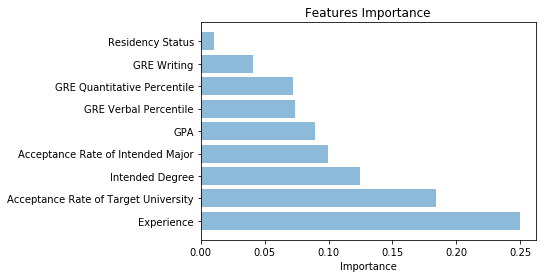

In [174]:
f = rdf.feature_importances_
print(f[:12],sum(f[12:]))

importance = {
    'Experience': sum(f[12:]),
    'Acceptance Rate of Target University': f[0],
    'Acceptance Rate of Intended Major': f[1],
    'GPA': f[2],
    'GRE Verbal Percentile': f[3],
    'GRE Quantitative Percentile': f[4],
    'GRE Writing': f[5],
    'Intended Degree': np.mean(f[6]+f[7]),
    'Residency Status': np.mean(f[8:11]),
}

name = []
score = []
for k in sorted(importance, key=importance.get, reverse=True):
    name.append(k)
    score.append(importance[k])
    
    
y_pos = np.arange(len(name))
plt.barh(y_pos, score, align='center', alpha=0.5)
plt.yticks(y_pos, name)
plt.xlabel('Importance')
plt.title('Features Importance')

# f, t, _ = metrics.roc_curve(testing_y, pred1)

# plt.figure()
# plt.plot(f, t)
# plt.plot([0,0.5,1],[0,0.5,1])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.show()

In [9]:
# Final model
universityAcceptanceRateDict = defaultdict(list)
universityGPADict = defaultdict(list)
universityGREVDict = defaultdict(list)
universityGREQDict = defaultdict(list)
universityGREWDict = defaultdict(list)
majorAcceptanceRateDict = defaultdict(list)
majorGPADict = defaultdict(list)
majorGREWDict = defaultdict(list)
majorGREVDict = defaultdict(list)
majorGREQDict = defaultdict(list)

random.shuffle(data)
for d in data:
    uniName = d[1]
    major = majorAggregator(d[2])
    degree = d[3]
    decision = d[5]
    gpa = d[9]
    greV = d[10]
    greQ = d[11]
    greW = d[12]
    isNewGRE = d[13]
    status = d[15]
    comment = d[18]
    
    if decision == 'Accepted':
        universityAcceptanceRateDict[uniName].append(1)
        majorAcceptanceRateDict[major].append(1)
    else:
        universityAcceptanceRateDict[uniName].append(0)
        majorAcceptanceRateDict[major].append(0)
    
    if float(gpa) <= 4:
        if d[5] == 'Accepted':
            majorGPADict[major].append(float(gpa))
        
    if isNewGRE == 'True':
        if d[5] == 'Accepted':
            universityGREVDict[uniName].append(newGREPercentileDict[float(greV)][0])
            majorGREVDict[major].append(newGREPercentileDict[float(greV)][0])
    else:
        if d[5] == 'Accepted':
            universityGREVDict[uniName].append(oldGREPercentileDict[float(greV)][0])
            majorGREVDict[major].append(oldGREPercentileDict[float(greV)][0])
        
    if isNewGRE == 'True':
        if d[5] == 'Accepted':
            universityGREVDict[uniName].append(newGREPercentileDict[float(greQ)][1])
            majorGREVDict[major].append(newGREPercentileDict[float(greQ)][1])
    else:
        if d[5] == 'Accepted':
            universityGREVDict[uniName].append(oldGREPercentileDict[float(greQ)][1])
            majorGREVDict[major].append(oldGREPercentileDict[float(greQ)][1])
        
    if greW != '':
        if d[5] == 'Accepted':
            universityGREWDict[uniName].append(float(greW))
            majorGREWDict[major].append(float(greW))
    
# comment analysis
stemmer = nltk.stem.porter.PorterStemmer()
wordDict = defaultdict(int)
ngramDict = defaultdict(int)
goodngramDict = defaultdict(int)
goodWordDict = defaultdict(int)
# construct feature based on positive comment
# so no need to purify words related to rejection
forbiddenWords = ['accepted', 'admitted', 'admission', 'offer', 'fund', 'stipend',
                 'TAship', 'official', 'unofficial', 'decline', 'financial', 'assistantship',
                 'tuition', 'email', 'phone', 'website', 'excited', 'happy', 'aid']
forbiddenWords = [stemmer.stem(w) for w in forbiddenWords]
forbiddenWords = set(forbiddenWords)

for d in data:  
    words = d[18].lower()
    words = ''.join([c for c in words if c not in string.punctuation]).split()
            
    for word in words:
        word = stemmer.stem(word)
        if word not in sw and word not in forbiddenWords:
            if d[5] == 'Accepted':
                goodWordDict[word] += 1
            wordDict[word] += 1  
        
# word frequency
freq = defaultdict(float)
total = sum(wordDict.values())
for word in wordDict.keys():
    freq[word] = wordDict[word]/total
    
goodFreq = defaultdict(float)
total1 = sum(goodWordDict.values())
for word in goodWordDict.keys():
    goodFreq[word] = goodWordDict[word]/total1
    
tops = [(goodFreq[w] - freq[w], w) for w in goodFreq]
tops = sorted(tops, reverse=True)[:500]
tops = [word for (freq,word) in tops]

def feat(d):
    uniName = d[1]
    major = majorAggregator(d[2])
    degree = d[3]
    gpa = d[9]
    greV = d[10]
    greQ = d[11]
    greW = d[12]
    isNewGRE = d[13]
    greSubject = d[14]
    status = d[15]
    comment = d[18]
    
    feature = []
    # acceptance rate of target university
    admissionResUni = universityAcceptanceRateDict[uniName]
    if len(admissionResUni) > 10:
        feature.append(sum(admissionResUni)/len(admissionResUni))
    else:
        feature.append(0.68)
        
    # acceptance rate of intended major
    admissionResMajor = majorAcceptanceRateDict[major]
    if len(admissionResMajor) > 10:
        feature.append(sum(admissionResMajor)/len(admissionResMajor))
    else:
        feature.append(0.58)
    
    # difference between the GPA and the median GPA of the target university
    medianGPAUni = 3.6
    if len(universityGPADict[uniName]) > 10:
        medianGPAUni = np.median(universityGPADict[uniName])
    feature.append(float(gpa) - medianGPAUni)
    
    # difference between the GPA and the median GPA of the intended major
    medianGPAMajor = 3.6
    if len(majorGPADict[major]) > 10:
        medianGPAMajor = np.median(majorGPADict[major])
    feature.append(float(gpa) - medianGPAMajor)

    # degree type
    if degree == 'PhD':
        feature += [1,0]
    else:
        feature += [0,1]
    
    greVMedian = 80;
    if len(majorGREVDict[major]) > 10:
        greVMedian = np.median(majorGREVDict[major])
        
    greQMedian = 77;
    if len(majorGREQDict[major]) > 10:
        greQMedian = np.median(majorGREQDict[major])
    
    # GRE percentile
    if isNewGRE == 'True':
            feature.append(newGREPercentileDict[float(greV)][0] - greVMedian)
            feature.append(newGREPercentileDict[float(greQ)][1] - greQMedian)
    else:
            feature.append(oldGREPercentileDict[float(greV)][0] - greVMedian)
            feature.append(oldGREPercentileDict[float(greQ)][1] - greQMedian)
    
    # difference between GRE writing score and the GRE writing score of target university
    greWMedianUni = 4
    if len(universityGREWDict[uniName]) > 10:
        greWMedianUni = np.median(universityGREWDict[uniName])
        
    if greW != '':
        feature.append(float(greW) - greWMedianUni)
    else:
        feature.append(0)
    
#     difference between GRE writing score and the GRE writing score of intended major
    greWMedianMajor = 4
    if len(majorGREWDict[major]) > 10:
        greWMedianMajor = np.median(majorGREWDict[major])
        
    if greW != '':
        feature.append(float(greW) - greWMedianMajor)
    else:
        feature.append(0)
    
    # residency status
    if status == 'American':
        feature += [1,0,0,0]
    elif status == 'International with US Degree':
        feature += [0,1,0,0]
    elif status == 'International':
        feature += [0,0,1,0]
    else:
        feature += [0,0,0,1]
    
    comment = comment.lower()
    comment = ''.join([c for c in comment if c not in string.punctuation]).split()
    wordSet = set()
    
    # comment analysis (unigram)
    for word in comment:
        word = stemmer.stem(word)
        wordSet.add(word)
       
    feature += [w in wordSet for w in tops]
    return feature

X = [feat(d) for d in data]
y = [d[5] == 'Accepted' for d in data]

In [10]:
rdf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=2, class_weight='balanced', n_jobs=-1)
rdf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [11]:
import pickle

In [12]:
pickle.dump(rdf, open('predictor', 'wb'))
pickle.dump(newGREPercentileDict, open('newGREPercentileDict', 'wb'))
pickle.dump(oldGREPercentileDict, open('oldGREPercentileDict', 'wb'))
pickle.dump(majorAggregatorDict, open('majorAggregatorDict', 'wb'))

pickle.dump(universityAcceptanceRateDict, open('universityAcceptanceRateDict', 'wb'))
pickle.dump(universityGPADict, open('universityGPADict', 'wb'))
pickle.dump(universityGREVDict, open('universityGREVDict', 'wb'))
pickle.dump(universityGREQDict, open('universityGREQDict', 'wb'))
pickle.dump(universityGREWDict, open('universityGREWDict', 'wb'))
pickle.dump(majorAcceptanceRateDict, open('majorAcceptanceRateDict', 'wb'))
pickle.dump(majorGPADict, open('majorGPADict', 'wb'))
pickle.dump(majorGREVDict, open('majorGREVDict', 'wb'))
pickle.dump(majorGREQDict, open('majorGREQDict', 'wb'))
pickle.dump(majorGREWDict, open('majorGREWDict', 'wb'))
pickle.dump(tops, open('tops', 'wb'))

In [2]:
import pickle
import numpy as np
rdf = pickle.load(open('predictor', 'rb'))
newGREPercentileDict = pickle.load(open('newGREPercentileDict', 'rb'))
oldGREPercentileDict = pickle.load(open('oldGREPercentileDict', 'rb'))
majorAggregatorDict = pickle.load(open('majorAggregatorDict', 'rb'))

universityAcceptanceRateDict = pickle.load(open('universityAcceptanceRateDict', 'rb'))
universityGPADict = pickle.load(open('universityGPADict', 'rb'))
universityGREVDict = pickle.load(open('universityGREVDict', 'rb'))
universityGREQDict = pickle.load(open('universityGREQDict', 'rb'))
universityGREWDict = pickle.load(open('universityGREWDict', 'rb'))
majorAcceptanceRateDict = pickle.load(open('majorAcceptanceRateDict', 'rb'))
majorGPADict = pickle.load(open('majorGPADict', 'rb'))
majorGREVDict = pickle.load(open('majorGREVDict', 'rb'))
majorGREQDict = pickle.load(open('majorGREQDict', 'rb'))
majorGREWDict = pickle.load(open('majorGREWDict', 'rb'))
tops = pickle.load(open('tops', 'rb'))


def majorAggregator(major):
    for k in majorAggregatorDict.keys():
        for majorWord in majorAggregatorDict[k]:
            if majorWord in major.lower():
                return k
    return 'other'


def feat(d):
    uniName = d[1]
    major = majorAggregator(d[2])
    degree = d[3]
    gpa = d[9]
    greV = d[10]
    greQ = d[11]
    greW = d[12]
    isNewGRE = d[13]
    greSubject = d[14]
    status = d[15]
    comment = d[18]
    
    feature = []
    # acceptance rate of target university
    admissionResUni = universityAcceptanceRateDict[uniName]
    if len(admissionResUni) > 10:
        feature.append(sum(admissionResUni)/len(admissionResUni))
    else:
        feature.append(0.68)
        
    # acceptance rate of intended major
    admissionResMajor = majorAcceptanceRateDict[major]
    if len(admissionResMajor) > 10:
        feature.append(sum(admissionResMajor)/len(admissionResMajor))
    else:
        feature.append(0.58)
    
    # difference between the GPA and the median GPA of the target university
    medianGPAUni = 3.6
    if len(universityGPADict[uniName]) > 10:
        medianGPAUni = np.median(universityGPADict[uniName])
    feature.append(float(gpa) - medianGPAUni)
    
    # difference between the GPA and the median GPA of the intended major
    medianGPAMajor = 3.6
    if len(majorGPADict[major]) > 10:
        medianGPAMajor = np.median(majorGPADict[major])
    feature.append(float(gpa) - medianGPAMajor)

    # degree type
    if degree == 'PhD':
        feature += [1,0]
    else:
        feature += [0,1]
    
    greVMedian = 80;
    if len(majorGREVDict[major]) > 10:
        greVMedian = np.median(majorGREVDict[major])
        
    greQMedian = 77;
    if len(majorGREQDict[major]) > 10:
        greQMedian = np.median(majorGREQDict[major])
    
    # GRE percentile
    if isNewGRE == 'True':
            feature.append(newGREPercentileDict[float(greV)][0] - greVMedian)
            feature.append(newGREPercentileDict[float(greQ)][1] - greQMedian)
    else:
            feature.append(oldGREPercentileDict[float(greV)][0] - greVMedian)
            feature.append(oldGREPercentileDict[float(greQ)][1] - greQMedian)
    
    # difference between GRE writing score and the GRE writing score of target university
    greWMedianUni = 4
    if len(universityGREWDict[uniName]) > 10:
        greWMedianUni = np.median(universityGREWDict[uniName])
        
    if greW != '':
        feature.append(float(greW) - greWMedianUni)
    else:
        feature.append(0)
    
#     difference between GRE writing score and the GRE writing score of intended major
    greWMedianMajor = 4
    if len(majorGREWDict[major]) > 10:
        greWMedianMajor = np.median(majorGREWDict[major])
        
    if greW != '':
        feature.append(float(greW) - greWMedianMajor)
    else:
        feature.append(0)
    
    # residency status
    if status == 'American':
        feature += [1,0,0,0]
    elif status == 'International with US Degree':
        feature += [0,1,0,0]
    elif status == 'International':
        feature += [0,0,1,0]
    else:
        feature += [0,0,0,1]
    
    comment = comment.lower()
    comment = ''.join([c for c in comment if c not in string.punctuation]).split()
    wordSet = set()
    
    # comment analysis (unigram)
    for word in comment:
        word = stemmer.stem(word)
        wordSet.add(word)
       
    feature += [w in wordSet for w in tops]
    return feature

feature = feat(['','Columbia University','Math','MS','','','','','','3.3','160','165','3','True','','International','','',""])
rdf.predict_proba([feature])[:,1]

array([0.37081214])